<a href="https://colab.research.google.com/github/ArashDehghanyan/ml-practicres/blob/main/machine_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Image classification with Tensorflow
##CIFAR-10 dataset

In [ ]:
import tensorflow as tf
from tensorflow import keras

(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
assert X_train.shape == (50000, 32, 32, 3)
assert X_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [ ]:
# model returns a vector of logits
predictions = model(X_train[:1]).numpy()
print(predictions)
# softmax converts logits to probabilities
print(tf.nn.softmax(predictions).numpy())


[[-0.15057932 -0.7330889   0.53583467  0.18190432  0.381413   -0.5678117
  -0.21426132 -1.431147   -0.28632313  0.25687408]]
[[0.09180272 0.05127136 0.18237333 0.1280122  0.15627764 0.06048585
  0.08613879 0.02551009 0.08014985 0.13797814]]


In [ ]:
# Define loss function
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
print(loss(y_train[:1], predictions))
model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50)

tf.Tensor(2.4517953, shape=(), dtype=float32)
Epoch 1/50
1563/1563 [==============================] - 9s 5ms/step - loss: 2.0416 - accuracy: 0.2361
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9503 - accuracy: 0.2712
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9316 - accuracy: 0.2796
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9212 - accuracy: 0.2882
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9083 - accuracy: 0.2925
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9013 - accuracy: 0.2956
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8990 - accuracy: 0.2993
Epoch 8/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8969 - accuracy: 0.2992
Epoch 9/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8890 - accuracy: 0.3080
Epoch 10/50
1563/1563 [=============

In [ ]:
model.evaluate(X_test, y_test, verbose=2)
# Attach softmax to return probability
probability_model = tf.keras.models.Sequential([
    model,
    tf.keras.layers.Softmax()
])
probability_model(X_test[:1])

313/313 - 1s - loss: 1.7395 - accuracy: 0.3819 - 719ms/epoch - 2ms/step


<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.11617422, 0.03825146, 0.18683454, 0.12743394, 0.12155565,
        0.19818279, 0.07873913, 0.01184955, 0.10592874, 0.01505004]],
      dtype=float32)>

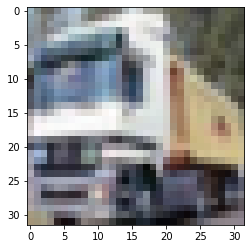

In [ ]:
import matplotlib.pyplot as plt
# print(X_train[0])
plt.imshow(X_train[1])
# plt.title(y_train[1])

##MNIST dataset

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print(x_train.shape)
print(x_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


Text(0.5, 1.0, '5')

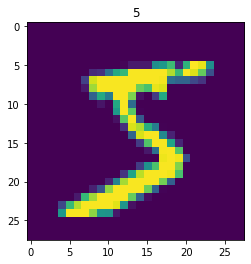

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.title(str(y_train[0]))

In [ ]:
nn_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])
print(nn_model(x_train[:1]).numpy())
print(tf.nn.softmax(nn_model(x_train[:1]).numpy()).numpy())
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
nn_model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])
nn_model.fit(x_train, y_train, epochs=5)
nn_model.evaluate(x_test, y_test, verbose=2)

[[-0.56332785 -0.16087216  0.02376984  0.28391185 -0.3122114  -0.04288872
  -0.20661332  0.39693153  0.21718742  0.21454725]]
[[0.05556754 0.08310085 0.09995269 0.12965004 0.07142983 0.09350719
  0.07938534 0.1451632  0.12128152 0.12096173]]
Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2984 - accuracy: 0.9130
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1450 - accuracy: 0.9571
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1094 - accuracy: 0.9672
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0891 - accuracy: 0.9732
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0749 - accuracy: 0.9762
313/313 - 1s - loss: 0.0803 - accuracy: 0.9752 - 507ms/epoch - 2ms/step


[0.0802774578332901, 0.9751999974250793]

7


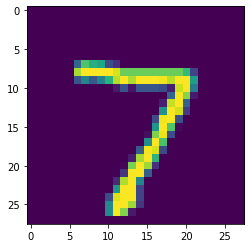

In [ ]:
import numpy as np
prob_model = tf.keras.models.Sequential([
                                         nn_model,
                                         tf.keras.layers.Softmax()
])
print(np.argmax(prob_model(x_test[:1]).numpy()))
plt.imshow(x_test[0])

In [ ]:
print(y_train.shape)
print(y_test.shape)

(50000, 1)
(10000, 1)


In [ ]:
X_train_rows = X_train.reshape(-1, 32 * 32 * 3)
print(X_train_rows.shape)
X_test_rows = X_test.reshape(-1, 32 * 32 *3)
print(X_test_rows.shape)

(50000, 3072)
(10000, 3072)


#Nearest Neighbor Algorithm

In [ ]:
import numpy as np

class NearestNeighbor(object):
    def __init__(self):
        pass
    
    def train(self, X, y):
        
        self.X_train = X
        self.y_train = y

    def predict(self, X):

        n_samples = X.shape[0]
        y_pred = np.zeros(n_samples, dtype = self.y_train.dtype)

        # loop over all test rows
        for i in range(n_samples):
            # L1 norm 
            # distances = np.sum(np.abs(self.X_train - X[i, :]), axis=1)
            # L2 norm
            distances = np.sqrt(np.sum(np.square(self.X_train - X[i, :]), axis=1))
            min_index = np.argmin(distances)
            y_pred[i] = self.y_train[min_index]
        
        return y_pred


In [ ]:
mynn = NearestNeighbor()
mynn.train(X_train_rows, y_train)
y_predict = mynn.predict(X_test_rows)

print("accuracy: %.2f" % np.mean(y_predict == y_test))

accuracy: 0.10


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

nn = KNeighborsClassifier(n_neighbors=1)
nn.fit(X_train_rows, y_train.ravel())
y_pred = nn.predict(X_test_rows)
print("accuracy: %.2f" % np.mean(y_pred == y_test))

accuracy: 0.10


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

nn = KNeighborsClassifier(n_neighbors=1)
nn.fit(X_train_rows, y_train.ravel())
y_pred = nn.predict(X_test_rows)
print("accuracy: %.2f" % nn.score(X_test_rows, y_test))

accuracy: 0.35


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

nn = KNeighborsClassifier(n_neighbors=10)
nn.fit(X_train_rows, y_train.ravel())
y_pred = nn.predict(X_test_rows)
print("accuracy: %.2f" % nn.score(X_test_rows, y_test))

accuracy: 0.34


In [ ]:
X_val_rows = X_train_rows[:1000, :]
y_val = y_train[:1000]
X_train_rows = X_train_rows[1000:, :]
y_train = y_train[1000:]

validation_accuracies = []
for k in [1, 3, 5, 10, 20, 50, 100]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_rows, np.ravel(y_train))
    acc = knn.score(X_val_rows, y_val)
    print("%s neighbors, accuracy: %.2f" % (k, acc))
    validation_accuracies.append((k, acc))


1 neighbors, accuracy: 0.34
3 neighbors, accuracy: 0.34
5 neighbors, accuracy: 0.33
10 neighbors, accuracy: 0.35
20 neighbors, accuracy: 0.35
50 neighbors, accuracy: 0.34
100 neighbors, accuracy: 0.32


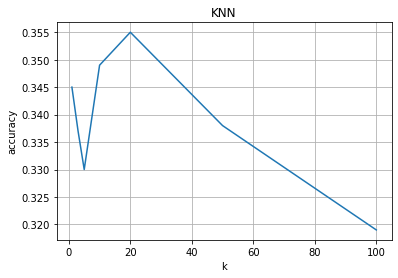

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
validation = np.array(validation_accuracies)
plt.plot(validation[:, 0], validation[:, 1])
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('KNN')
plt.grid()
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train_rows, np.ravel(y_train))
print("accuracy: %.2f" % knn.score(X_test_rows, y_test))

accuracy: 0.34


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print("train images shape:", train_images.shape)
print("train labels shape:", train_labels.shape)
print("test images shape:", test_images.shape)
print("test labels shape:", test_labels.shape)

4431872/4422102 [==============================] - 0s 0us/step
train images shape: (60000, 28, 28)
train labels shape: (60000,)
test images shape: (10000, 28, 28)
test labels shape: (10000,)


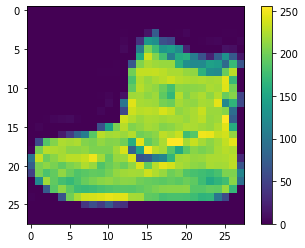

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

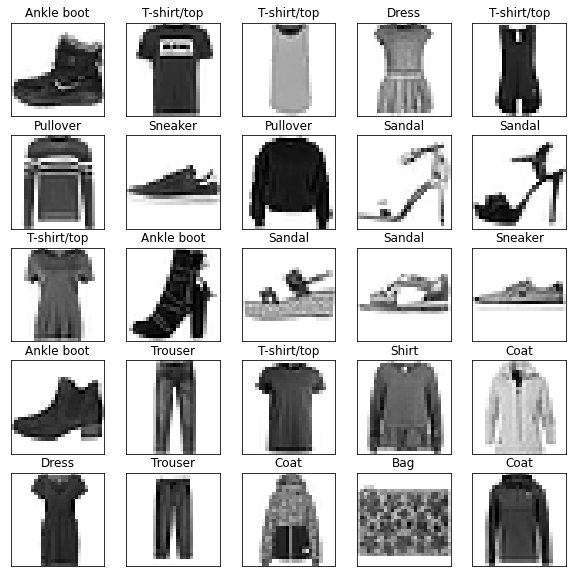

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[i]])
plt.show()

In [ ]:
# Define model
fashion_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
fashion_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
# Train model
fashion_model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5043 - accuracy: 0.8229
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3831 - accuracy: 0.8624
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3430 - accuracy: 0.8746
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3159 - accuracy: 0.8831
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2995 - accuracy: 0.8892
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2865 - accuracy: 0.8946
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2722 - accuracy: 0.8998
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2622 - accuracy: 0.9032
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2507 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.241

In [ ]:
test_loss, test_acc = fashion_model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)

313/313 - 1s - loss: 0.3320 - accuracy: 0.8831 - 558ms/epoch - 2ms/step

Test accuracy: 0.8830999732017517


In [ ]:
probabilty_fashion_model = tf.keras.models.Sequential([
                                                       fashion_model,
                                                       tf.keras.layers.Softmax()
])
predictions = probabilty_fashion_model.predict(test_images)
print("predicted probability:", predictions[0])
print("\npredicted label:", np.argmax(predictions[0]))
print("\nTrue label:", test_labels[0])
print("\nclass name:", class_names[test_labels[0]])

predicted probability: [1.5148574e-07 5.0765559e-12 1.9440350e-08 2.1508132e-11 1.1410902e-08
 1.6078538e-03 3.0995588e-07 2.0253684e-02 1.0122547e-07 9.7813785e-01]

predicted label: 9

True label: 9

class name: Ankle boot


In [ ]:
def plot_image(i, predictions_array, true_label, img):
    """plot image"""
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% {}".format(class_names[predicted_label], 
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
               color=color)
    
def plot_value_array(i, predictions_array, true_label):
    """plot a bar plot of predicted and true label."""
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

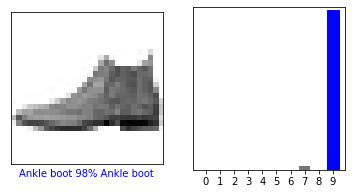

In [ ]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

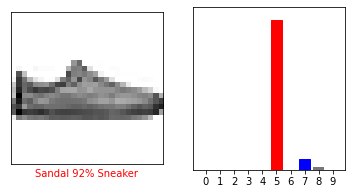

In [ ]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

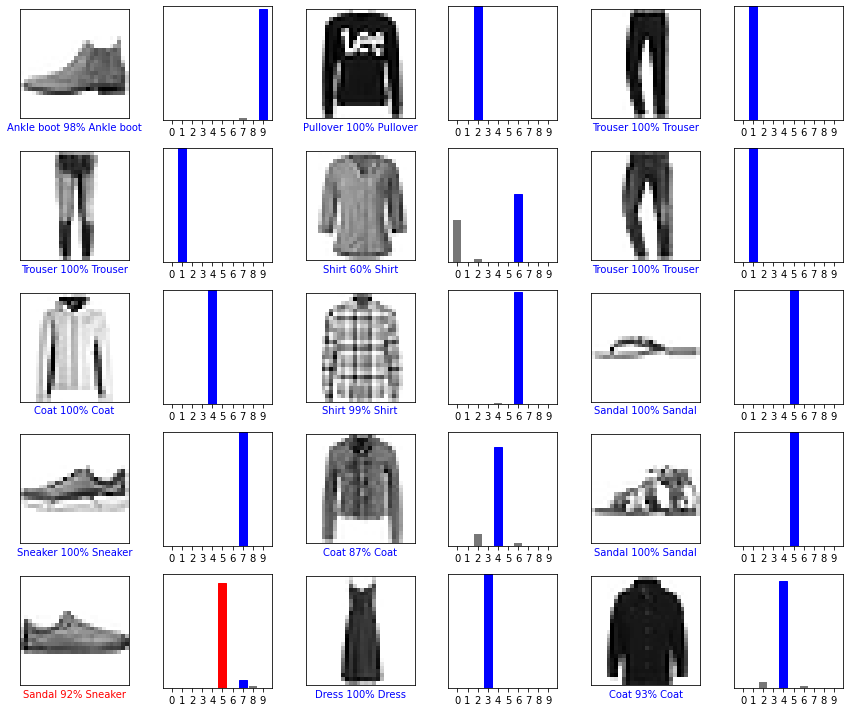

In [ ]:
# plot some images and their true and predicted labels and color them
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()
plt.show()

#Use trained model
##Predict single image

(28, 28)
(1, 28, 28)
tf.Tensor(
[[2.3569472e-05 2.7527177e-15 9.9951971e-01 1.6873654e-12 6.3718770e-05
  1.3305682e-16 3.9291070e-04 5.0465529e-16 2.5414148e-14 2.1849815e-18]], shape=(1, 10), dtype=float32)


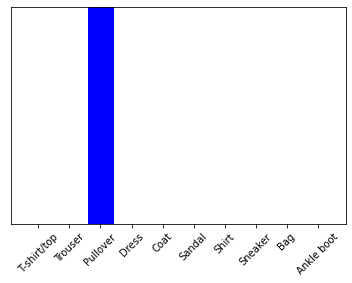

2


In [ ]:
img = test_images[1]
print(img.shape)
# Add the image to a batch, expand image dimensions
img = (np.expand_dims(img, 0))
print(img.shape)
single_predict = probabilty_fashion_model(img)
print(single_predict)
plot_value_array(1, single_predict[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()
print(np.argmax(single_predict[0]))

#Linear Regression

In [ ]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make numpy printouts easier to read
np.set_printoptions(precision=3, suppress=True)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.8.0


In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [ ]:
print(dataset.isna().sum())
print(len(dataset))
dataset.dropna(inplace=True)
print(dataset.isna().sum())
print(len(dataset))
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset.head()


MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64
398
MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64
392


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA


In [ ]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)
print(train_dataset.shape)
print(test_dataset.shape)

(314, 10)
(78, 10)


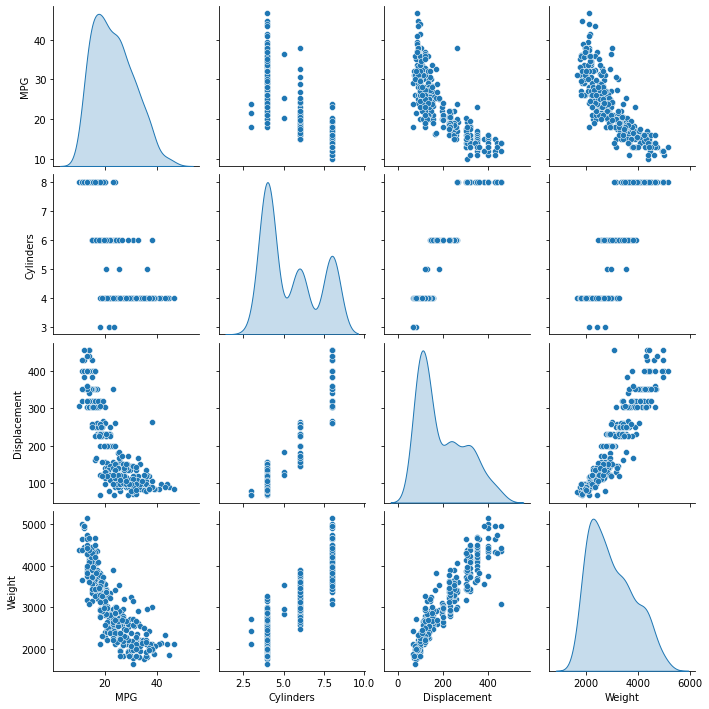

In [ ]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

In [ ]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop("MPG")
print(train_features.shape)
print(test_features.shape)

(314, 9)
(78, 9)


In [ ]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642
Europe,0.178344,0.383413
Japan,0.197452,0.398712
USA,0.624204,0.485101


##Normalization layer

In [ ]:
normalizer = layers.Normalization(axis=-1)
# Fit the state of the preprocessing layer to the data
normalizer.adapt(np.array(train_features))
# Calculate the mean and variance
print(normalizer.mean.numpy())
print()
# When the layer is called, it returns the input data, with each feature independently normalized
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
    print("first example:", first)
    print()
    print("Normalized:", normalizer(first).numpy())

[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
     0.624]]

first example: [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]

Normalized: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


##Linear Regression

###One Variable Linear Regression

In [ ]:
from matplotlib import axis
horsepower = np.array(train_features['Horsepower'])
horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)


###keras Sequential model

In [ ]:
horsepower_model = keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [ ]:
horsepower_model.predict(horsepower[:10]).shape

(10, 1)

###Configure the training procedure

In [ ]:
horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)


In [ ]:
%%time
# Execute training for 100 epochs
history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    # epochs number
    epochs=100,
    # Suppress logging
    verbose=0,
    # calculate validation results
    validation_split=0.2
)

CPU times: user 3.24 s, sys: 178 ms, total: 3.42 s
Wall time: 3.32 s


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.802597,4.179194,95
96,3.808211,4.171958,96
97,3.805562,4.194800,97
98,3.808051,4.206206,98
99,3.804353,4.166976,99


In [ ]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)


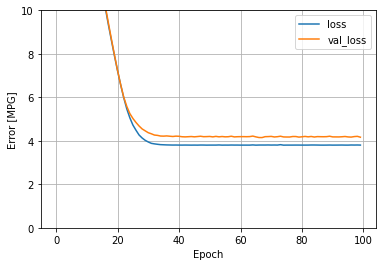

In [ ]:
plot_loss(history)

##Test Results

In [ ]:
test_results = {}

test_results['Horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, 
    verbose=0
)


In [ ]:
x = tf.linspace(0, 250, 251)
y = horsepower_model.predict(x)

In [ ]:
def plot_horsepower(x, y):
    plt.scatter(train_features['Horsepower'], train_labels, label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel('Horsepower')
    plt.ylabel('MPG')
    plt.legend()

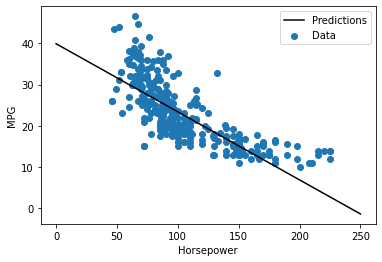

In [ ]:
plot_horsepower(x, y)

##Linear regression with multiple inputs

In [ ]:
linear_model = keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])
linear_model.summary()

linear_model.predict(train_features[:10])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense_1 (Dense)             (None, 1)                 10        
                                                                 
Total params: 29
Trainable params: 10
Non-trainable params: 19
_________________________________________________________________


array([[-0.582],
       [ 0.888],
       [-0.676],
       [ 0.811],
       [ 1.657],
       [ 0.779],
       [ 1.743],
       [ 0.626],
       [-0.191],
       [ 0.666]], dtype=float32)

In [ ]:
linear_model.layers[1].kernel

<tf.Variable 'dense_1/kernel:0' shape=(9, 1) dtype=float32, numpy=
array([[-0.504],
       [ 0.752],
       [-0.129],
       [-0.016],
       [ 0.406],
       [ 0.557],
       [-0.001],
       [ 0.762],
       [ 0.569]], dtype=float32)>

In [ ]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

In [ ]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging
    verbose=0,
    # Calculate validation results on %20 of training data
    validation_split=0.2
)

CPU times: user 3.51 s, sys: 153 ms, total: 3.66 s
Wall time: 3.36 s


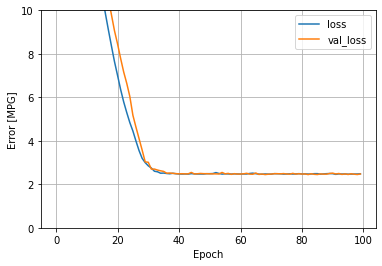

In [ ]:
plot_loss(history)

In [ ]:
test_results['linear_model'] = linear_model.evaluate(
    test_features,
    test_labels,
    verbose=0
)

In [ ]:
def build_and_compile_model(norm):
    """Create a DNN model"""
    model = keras.Sequential([
        norm,
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='mean_absolute_error'
    )

    return model

##Regression using a DNN

In [ ]:
dnn_horsepower_model = build_and_compile_model(horsepower_normalizer)
dnn_horsepower_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                128       
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [ ]:
%%time
history = dnn_horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

CPU times: user 3.81 s, sys: 177 ms, total: 3.99 s
Wall time: 3.67 s


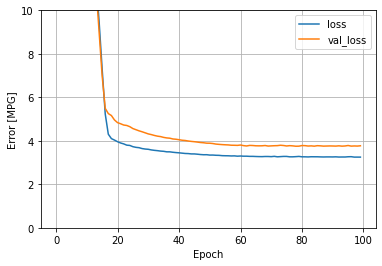

In [ ]:
plot_loss(history=history)

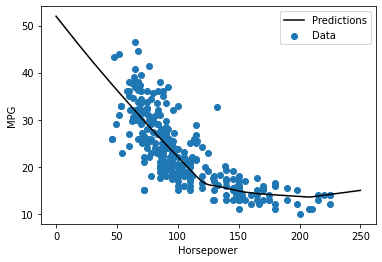

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = dnn_horsepower_model.predict(x)
plot_horsepower(x, y)

###Collect Test results for later

In [ ]:
test_results['dnn_horsepower_model'] = dnn_horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels,
    verbose=0
)


###Regression using a DNN and multiple input

In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense_5 (Dense)             (None, 64)                640       
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [ ]:
history = dnn_model.fit(
    train_features,
    train_labels,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

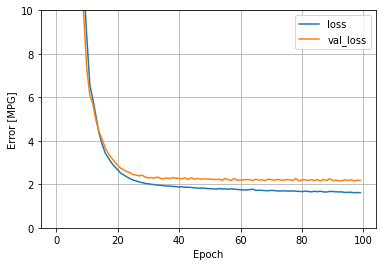

In [ ]:
plot_loss(history=history)

In [ ]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [ ]:
test_results

{'Horsepower_model': 3.650177478790283,
 'dnn_horsepower_model': 2.90740966796875,
 'dnn_model': 1.5770375728607178,
 'linear_model': 2.5243961811065674}

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error (MPG)']).T

,Mean absolute error (MPG)
Horsepower_model,3.650177
linear_model,2.524396
dnn_horsepower_model,2.907410
dnn_model,1.577038


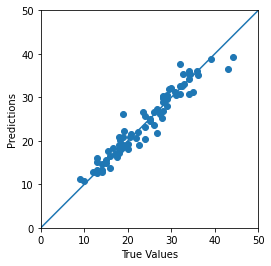

In [ ]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


##Error distribution

Text(0, 0.5, 'Count')

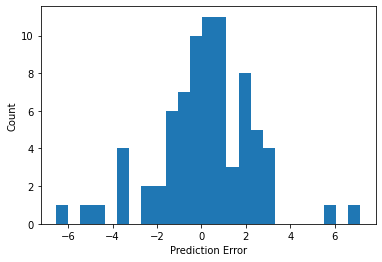

In [ ]:
error = test_predictions - test_labels

plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
plt.ylabel('Count')


###Save model

In [ ]:
dnn_model.save('dnn_model')

INFO:tensorflow:Assets written to: dnn_model/assets


In [ ]:
reloaded = keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(test_features, test_labels, verbose=0)

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error']).T

,Mean absolute error
Horsepower_model,3.650177
linear_model,2.524396
dnn_horsepower_model,2.907410
dnn_model,1.577038
reloaded,1.577038


#Overfitting and Underfitting

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers

print(tf.__version__)

2.8.0


In [2]:
! pip install git+https://github.com/tensorflow/docs

import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots


  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-u0gcoib9
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-u0gcoib9
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=174723 sha256=c1336062e8eba160591f95e015eaf22df1d1c3f8e91632132f207e58b5aa7882
  Stored in directory: /tmp/pip-ephem-wheel-cache-aybjf_q5/wheels/cc/c4/d8/5341e93b6376c5c929c49469fce21155eb69cef1a4da4ce32c
Successfully built tensorflow-docs


In [3]:
from IPython import display
from matplotlib import pyplot as plt

import numpy as np
import pathlib
import shutil
import tempfile

In [4]:
logdir = pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
shutil.rmtree(logdir, ignore_errors=True)

In [5]:
gz = tf.keras.utils.get_file('HIGGS.csv.gz', 'http://mlphysics.ics.uci.edu/data/higgs/HIGGS.csv.gz')

2816417792/2816407858 [==============================] - 77s 0us/step


In [7]:
FEATURES = 28
# Read csv records directly
ds = tf.data.experimental.CsvDataset(gz, [float(),]*(FEATURES+1), compression_type='GZIP')


In [8]:
def pack_row(*row):
    """Repack a list of Scalars into a (feature, label) pair."""
    label = row[0]
    features = tf.stack(row[1:], 1)
    return features, label

In [9]:
packed_ds = ds.batch(10000).map(pack_row).unbatch()

###Inspect some of the records

tf.Tensor(
[ 0.8692932  -0.6350818   0.22569026  0.32747006 -0.6899932   0.75420225
 -0.24857314 -1.0920639   0.          1.3749921  -0.6536742   0.9303491
  1.1074361   1.1389043  -1.5781983  -1.0469854   0.          0.65792954
 -0.01045457 -0.04576717  3.1019614   1.35376     0.9795631   0.97807616
  0.92000484  0.72165745  0.98875093  0.87667835], shape=(28,), dtype=float32)


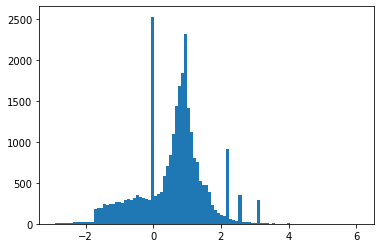

In [10]:
for features, label in packed_ds.batch(1000).take(1):
    print(features[0])
    plt.hist(features.numpy().flatten(), bins=101)

In [16]:
N_VALIDATION = int(1e3)
N_TRAIN = int(1e4)
BUFFER_SIZE = int(1e4)
BATCH_SIZE = 500
STEPS_PER_EPOCH = N_TRAIN // BATCH_SIZE


In [17]:
validate_ds = packed_ds.take(N_VALIDATION).cache()
train_ds = packed_ds.skip(N_VALIDATION).take(N_TRAIN).cache()
validate_ds = validate_ds.batch(BATCH_SIZE)
train_ds = train_ds.shuffle(BUFFER_SIZE).repeat().batch(BATCH_SIZE)


###Training Procedure

In [20]:
lr_schedule =  tf.keras.optimizers.schedules.InverseTimeDecay(
    0.001,
    decay_steps=STEPS_PER_EPOCH*1000,
    decay_rate=1,
    staircase=False
)

def get_optimizer():
    return tf.keras.optimizers.Adam(lr_schedule)
    

Text(0, 0.5, 'Learning Rate')

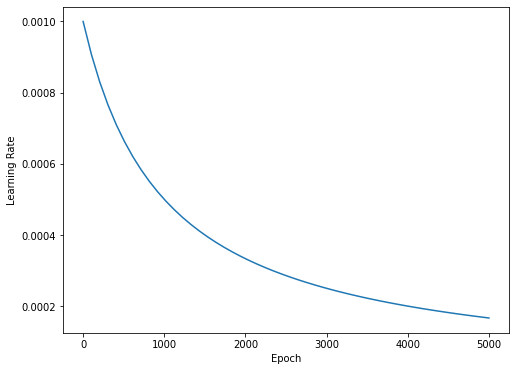

In [21]:
step = np.linspace(0, 100000)
lr = lr_schedule(step)
plt.figure(figsize=(8, 6))
plt.plot(step/STEPS_PER_EPOCH, lr)
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')


In [23]:
def get_callbacks(name):
    return [
        tfdocs.modeling.EpochDots(),
        tf.keras.callbacks.EarlyStopping(monitor='val_binary_crossentropy', patience=200),
        tf.keras.callbacks.TensorBoard(logdir/name)
    ]

In [24]:
def compile_and_fit(model, name, optimizer=None, max_epochs=10000):
    """compile and fit configuration for each model"""
    if optimizer is None:
        optimizer = get_optimizer()
    model.compile(
        optimizer=optimizer,
        loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
        metrics=[
                 tf.keras.losses.BinaryCrossentropy(from_logits=True, name='binary_crossentropy'),
                 'accuracy'
        ]
    )

    model.summary()

    history = model.fit(
        train_ds,
        steps_per_epoch=STEPS_PER_EPOCH,
        epochs=max_epochs,
        validation_data=validate_ds,
        callbacks=get_callbacks(name),
        verbose=0
    )
    return history

##Tiny model
###Start by training a model

In [25]:
tiny_model = tf.keras.Sequential([
    layers.Dense(16, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(1)
])

In [26]:
size_histories = {}

In [27]:
size_histories['tiny'] = compile_and_fit(tiny_model, 'sizes/tiny')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                464       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, accuracy:0.4989,  binary_crossentropy:0.8002,  loss:0.8002,  val_accuracy:0.4910,  val_binary_crossentropy:0.7680,  val_loss:0.7680,  
....................................................................................................
Epoch: 100, accuracy:0.6012,  binary_crossentropy:0.6231,  loss:0.6231,  val_accuracy:0.5860,  val_binary_crossentropy:0.6254,  val_loss:0.6254,  
............................................................

(0.5, 0.7)

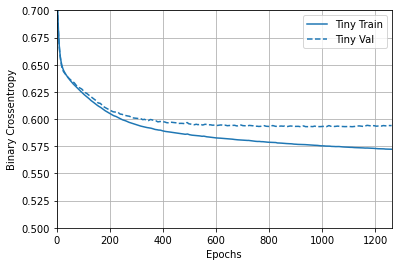

In [28]:
plotter = tfdocs.plots.HistoryPlotter(metric='binary_crossentropy', smoothing_std=10)
plotter.plot(size_histories)
plt.ylim([0.5, 0.7])